In [ ]:
%run ../00_AdvancedPythonConcepts/talktools.py

## Regression ## 
Let's take a look at the famous Boston Housing data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets

boston = datasets.load_boston() # Boston house-prices
X = boston['data']   # 13 features (e.g. crime, # rooms, age, etc.)
Y = boston['target'] # response (median house price)

In [3]:
print("feature vector shape=", X.shape)
print("class shape=", Y.shape)

feature vector shape= (506, 13)
class shape= (506,)


In [4]:
print(boston.feature_names)
print(type(boston.feature_names))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
<class 'numpy.ndarray'>


In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Let's plot some data (Y axis is what we want to predict)

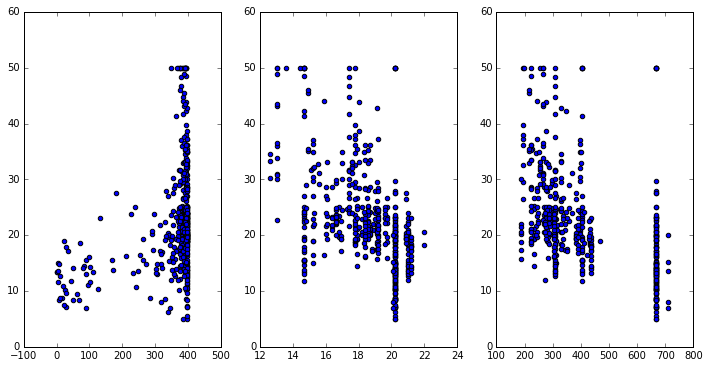

In [7]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,6))
ax1.scatter(X[:,11],Y)
ax2.scatter(X[:,10],Y)
ax3.scatter(X[:,9],Y)

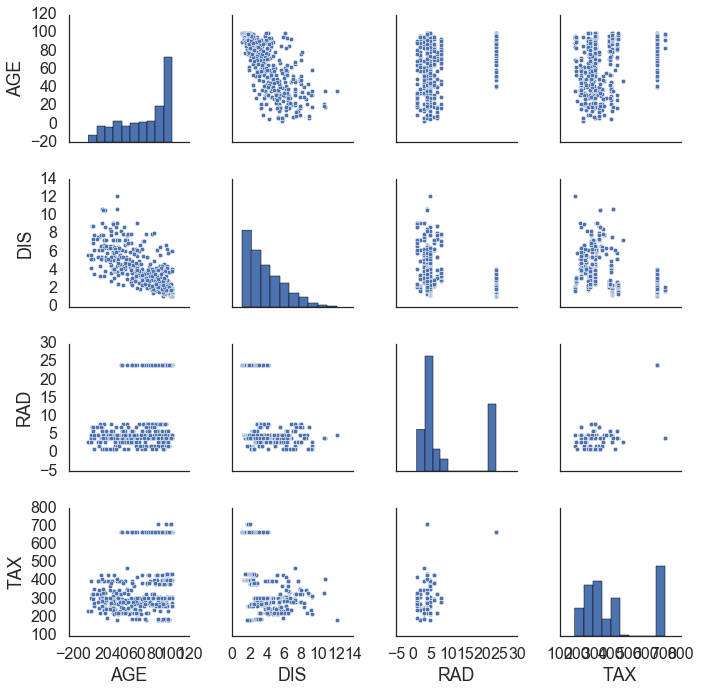

In [8]:
import seaborn as sns
import pandas as pd
sns.set(style="white")
sns.set_context("poster")
df = pd.DataFrame(X,columns=boston.feature_names)
df["target"]  = boston['target']
sns.pairplot(df[['AGE','DIS','RAD','TAX']])

### Basic Model Fitting

We need to create a **training set** and a **testing set**.

In [9]:
# half of data
import math
half = math.floor(len(Y)/2)
train_X = X[:half]
train_Y = Y[:half]
test_X = X[half:]
test_Y = Y[half:]

** Linear Regression **

The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the input variables. In mathematical notion, if $\hat{y}$ is the predicted value.
$$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$$
Across the module, we designate the vector $w = (w_1,
..., w_p)$ as `coef_` and $w_0$ as `intercept_`.
To perform classification with generalized linear models, see Logistic regression.

http://scikit-learn.org/stable/modules/linear_model.html

In [10]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [ ]:
clf.

In [11]:
# fit the model
clf.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# now do the prediction
Y_lr_pred = clf.predict(test_X)

# how well did we do?
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_Y,Y_lr_pred) ; print(mse)

302.64091133


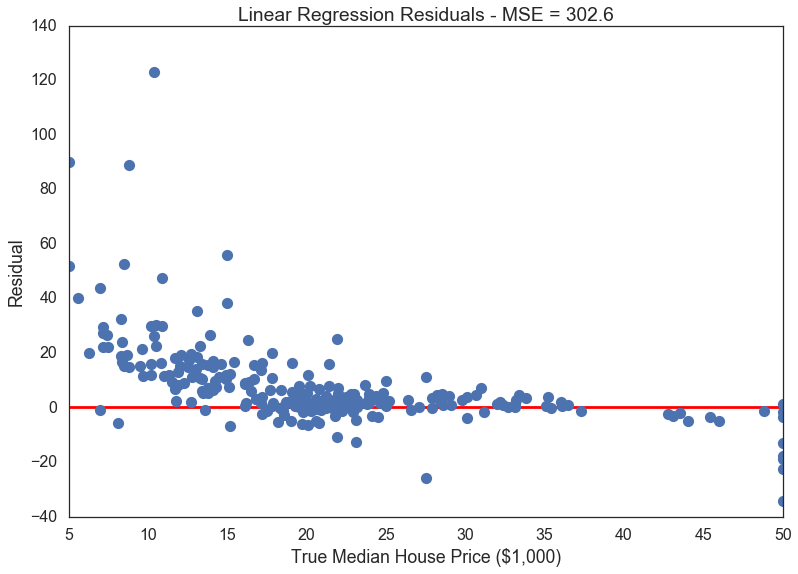

In [13]:
f, ax = plt.subplots()
ax.plot(test_Y,Y_lr_pred - test_Y,'o')
ax.set_title("Linear Regression Residuals - MSE = %.1f" % mse)
ax.set_xlabel("True Median House Price ($1,000)")
ax.set_ylabel("Residual")
ax.hlines(0,min(test_Y),max(test_Y),color="red")

** *k*-Nearest Neighbor (KNN) Regression **

"The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree.)."

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_regression_001.png">

http://scikit-learn.org/stable/modules/neighbors.html

In [14]:
from sklearn import neighbors
from sklearn import preprocessing
# many methods work better on scaled X
X_scaled = preprocessing.scale(X) 
clf1 = neighbors.KNeighborsRegressor(5)
train_X = X_scaled[:half]
test_X = X_scaled[half:]
clf1.fit(train_X,train_Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

37.4149833992


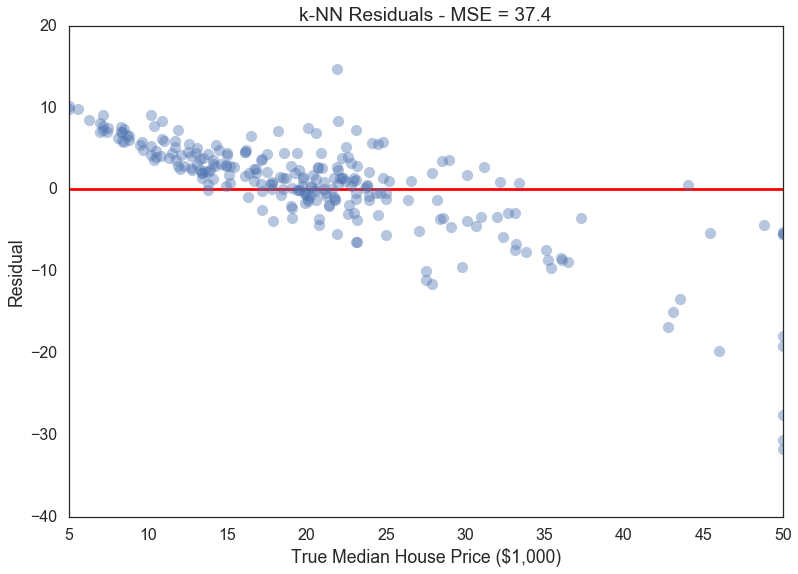

In [15]:
Y_knn_pred = clf1.predict(test_X)
mse = mean_squared_error(test_Y,Y_knn_pred) ; print(mse)

f, ax = plt.subplots()
ax.plot(test_Y, Y_knn_pred - test_Y,'o',alpha=0.4)
ax.set_title("k-NN Residuals - MSE = %.1f" % mse)
ax.set_xlabel("True Median House Price ($1,000)")
ax.set_ylabel("Residual")
ax.hlines(0,min(test_Y),max(test_Y),color="red")

Let's see what other datasets are readily available...

In [ ]:
datasets.

Some of these we need to download

In [16]:
cal_house = datasets.california_housing

In [17]:
cal_data = cal_house.fetch_california_housing()

In [18]:
print(cal_data.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [19]:
cal_data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [20]:
X = cal_data['data'] # 8 features 
Y = cal_data['target'] # response (median house price)
half = math.floor(len(Y)/2)

In [21]:
len(Y)

20640

In [30]:
from sklearn import neighbors
from sklearn import preprocessing

# remember: many methods work better on scaled X
X_scaled = preprocessing.scale(X) 
train_X = X_scaled[:half]
train_Y = Y[:half]
test_X = X_scaled[half:]
test_Y = Y[half:]
clf1 = neighbors.KNeighborsRegressor(15)
clf1.fit(train_X,train_Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=15, p=2,
          weights='uniform')

0.62158585477


(0, 5.1)

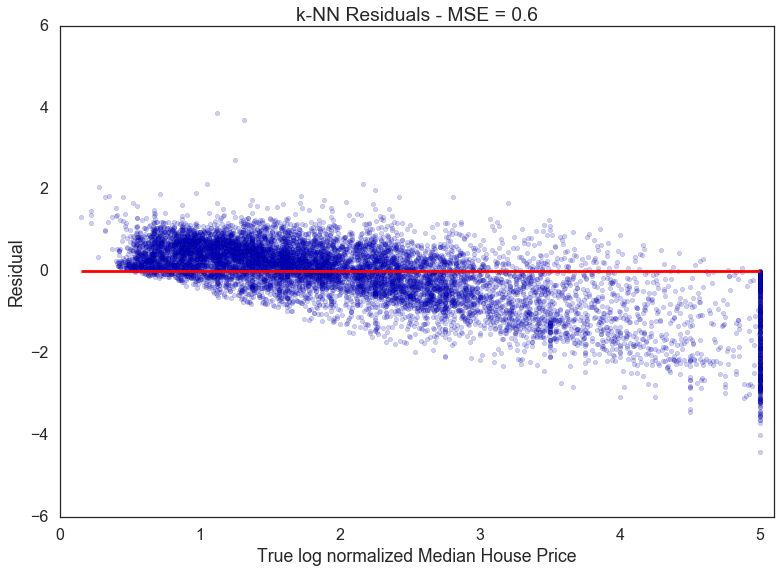

In [31]:
import seaborn as sns
sns.set_context("poster")

Y_knn_pred = clf1.predict(test_X)
mse = mean_squared_error(test_Y,Y_knn_pred) ; print(mse)

f, ax = plt.subplots()
ax.scatter(test_Y, Y_knn_pred - test_Y,alpha=0.2,edgecolors=None)
ax.set_title("k-NN Residuals - MSE = %.1f" % mse)
ax.set_xlabel("True log normalized Median House Price")
ax.set_ylabel("Residual")
ax.hlines(0,min(test_Y),max(test_Y),color="red")
ax.set_xlim(0,5.1)

**** 

## Breakout

## Error Estimation & Model Selection

**Q**: How will our model perform on future data?

So far, we’ve split the data, using one set to train the model and the other to test its performance

This train-test strategy avoids over-fitting to the sample on hand, but wastes data & can produce poor error estimates.

cf http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html

### model selection: cross-validation


- *K-fold CV* - randomly split the training data into K folds.  For each $k=1,...,K$, train model only on the data not in fold $k$ & predict for data in fold $k$.  Compute performance metric over CV predictions.

- *Leave-one-out (LOO) CV* - K-fold CV with  K = number of training points.

<img src="https://www.evernote.com/l/AUWvg9caKz1OO7opS2Ji3Z7OwOFkLCrg2WsB/image.png">

<img src="http://i.stack.imgur.com/YWgro.gif">

In [32]:
from sklearn import cross_validation

/Users/jbloom/anaconda/envs/seminar/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
cross_validation.

In [33]:
import numpy as np
from sklearn import datasets

boston = datasets.load_boston() ; X = boston['data'] ; Y = boston['target']
from sklearn import linear_model
clf = linear_model.LinearRegression()
from sklearn.cross_validation import cross_val_score

def print_cv_score_summary(model, xx, yy, cv):
    scores = cross_val_score(model, xx, yy, cv=cv, n_jobs=1)
    print("mean: {:3f}, stdev: {:3f}".format(
        np.mean(scores), np.std(scores)))

In [34]:
print_cv_score_summary(clf,X,Y,
                       cv=cross_validation.KFold(len(Y), 5))

mean: 0.350741, stdev: 0.379709


In [36]:
print_cv_score_summary(clf,X,Y,
    cv=cross_validation.KFold(len(Y),20,shuffle=True,random_state=1))

mean: 0.693575, stdev: 0.154062


## Classification

Classification - predicting the discrete class ($y$) of an object from a vector of input features ($\vec x$).

e.g.  $\vec x_{i=6}  = [5.1,  3.5, 1.4,  0.2]$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font size=-1>features = [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]</font>

and $y_{i=6} =$ “Iris-Setosa” 


For Iris:  Number of ($\vec x$, $y$) “instances” = 150

Number of classes = 3

In [37]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [38]:
print("feature vector shape=", X.shape)
print("class shape=", Y.shape)

feature vector shape= (150, 4)
class shape= (150,)


In [39]:
print(iris.target_names, type(iris.target_names))
print(iris.feature_names, type(iris.feature_names))

['setosa' 'versicolor' 'virginica'] <class 'numpy.ndarray'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] <class 'list'>


In [40]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

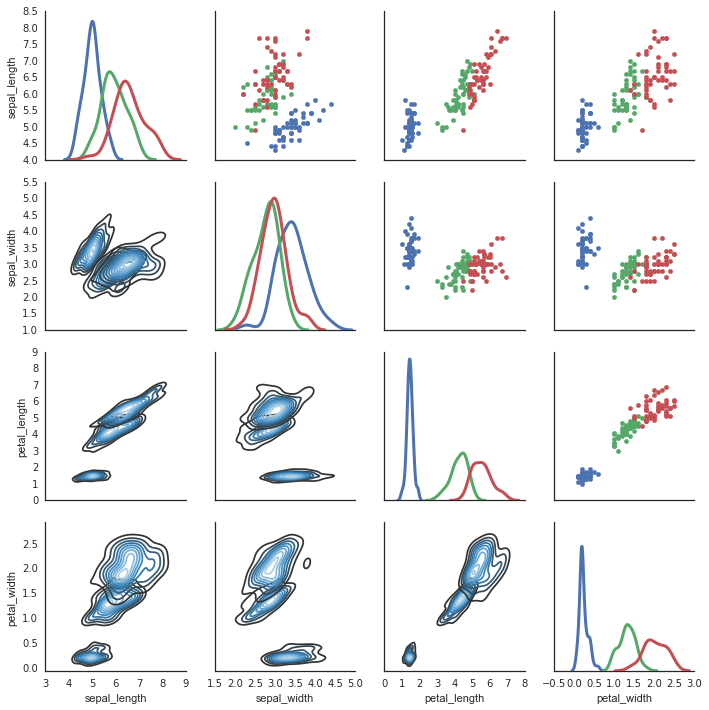

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

df = sns.load_dataset("iris")

g = sns.PairGrid(df, diag_sharey=False,hue="species")
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

 - KNN Classification:  `neighbors.KNeighborsClassifier`
 - LDA / QDA:  `lda.LDA` / `lda.QDA`
 - Naive Bayes: `naive_bayes.GaussianNB`
 - Support Vector Machines:   `svm.SVC`
 - Classification Trees:  `tree.DecisionTreeClassifier`
 - Random Forest:  `ensemble.RandomForestClassifier`
 - Multi-class & multi-label Classification is supported: `multiclass.OneVsRest`  `multiclass.OneVsOne` 

## Support Vector Machines (1992)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f2/Svm_intro.svg/2000px-Svm_intro.svg.png" width="50%">

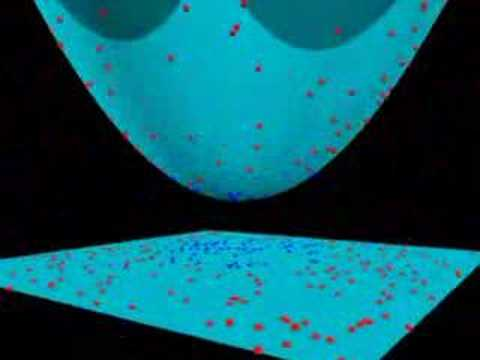

In [42]:
# SVM with polynomial kernel visualization
from IPython.display import YouTubeVideo
YouTubeVideo("3liCbRZPrZA")

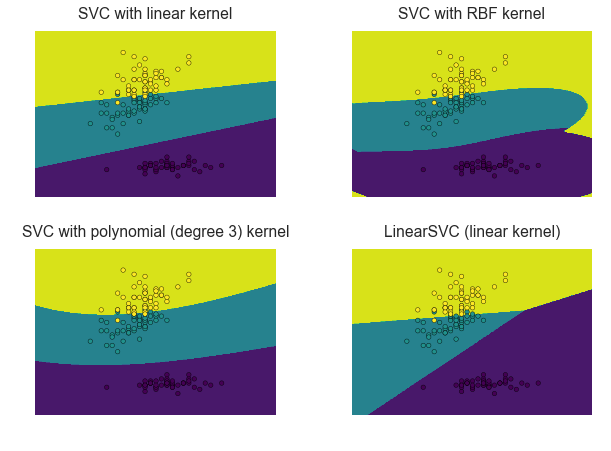

In [43]:
# adapted from http://scikit-learn.org/0.13/auto_examples/svm/plot_iris.html#example-svm-plot-iris-py
%matplotlib inline
import numpy as np
from sklearn import svm, datasets

sns.set_context("talk")

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 1:3]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target

h = 0.02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)
lin_svc = svm.LinearSVC(C=C).fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'LinearSVC (linear kernel)']

clfs = [svc, rbf_svc, poly_svc, lin_svc]

f,axs = plt.subplots(2,2)

for i, clf in enumerate(clfs):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    ax = axs[i//2][i % 2]
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z,cmap=plt.get_cmap("viridis"))
    ax.axis('off')

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=Y,cmap=plt.get_cmap("viridis"))

    ax.set_title(titles[i])

http://cs.stanford.edu/people/karpathy/svmjs/demo/

## kNearestNeighbors (kNN)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/2000px-KnnClassification.svg.png" width="50%">

For each test point, $\vec x_i$ find the $k$-nearest 
instances in the training data
Classify the point according to the majority vote of their 
class labels.

<img src="http://cs231n.github.io/assets/knn.jpeg">

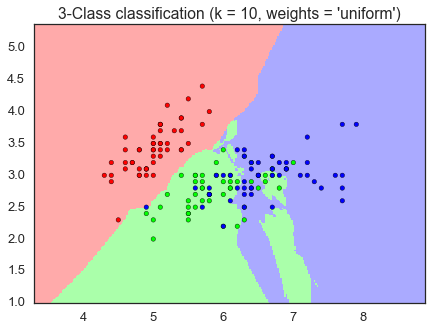

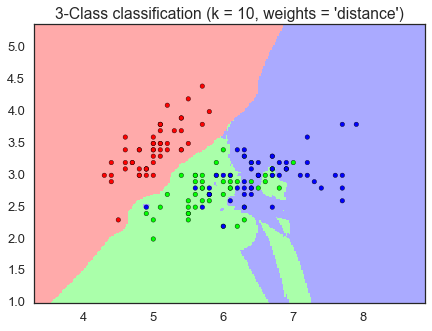

In [45]:
# %load http://scikit-learn.org/stable/_downloads/plot_classification.py
"""
================================
Nearest Neighbors Classification
================================

Sample usage of Nearest Neighbors classification.
It will plot the decision boundaries for each class.
"""

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

import seaborn as sns
sns.set_context("talk")

n_neighbors = 10

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7,5))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

In [47]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')
print("predicted:", knn.predict(iris_X_test))
print("actual   :", iris_y_test)

predicted: [2 1 2 1 0 1 0 0 1 1]
actual   : [2 1 2 1 0 1 0 0 1 1]


# model persistence

we might sometimes build a model that take a long time to construct. We can easily save the model (on disk) for future use.

In [48]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
import pickle
s    = pickle.dumps(clf)
clf2 = pickle.loads(s)
print("predictions:",clf2.predict(X)[::15], " (saved model)")
print("true labels:",y[::15])

predictions: [0 0 0 0 1 1 1 2 2 2]  (saved model)
true labels: [0 0 0 0 1 1 1 2 2 2]
